In [13]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nishchalchandel_crop_recommendation_path = kagglehub.dataset_download('nishchalchandel/crop-recommendation')

print('Data source import complete.')


Data source import complete.


In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation/crop_recommendation_dataset.csv


In [15]:
df=pd.read_csv("/kaggle/input/crop-recommendation/crop_recommendation_dataset.csv")
df

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop
0,20.879744,82.002744,202.935536,6.502985,69.3000,79.50000,94.4400,0.63,Loamy Soil,rice
1,21.770462,80.319644,226.655537,7.038096,72.0200,141.82400,141.6978,1.40,Loamy Soil,rice
2,23.004459,82.320763,263.964248,7.633568,77.7700,59.39000,81.8900,1.80,Peaty Soil,rice
3,26.491096,80.283629,242.864034,6.980401,78.6500,147.45895,142.9430,1.43,Loamy Soil,rice
4,20.280071,81.604873,262.717340,7.628473,73.9800,68.95000,95.7400,1.75,Peaty Soil,rice
...,...,...,...,...,...,...,...,...,...,...
3095,25.287846,89.636679,58.286977,6.765095,57.3400,144.48000,73.0800,1.64,Neutral Soil,watermelon
3096,26.638386,84.695469,48.324286,6.189214,56.0600,61.34000,47.9500,1.35,Peaty Soil,watermelon
3097,25.331045,84.305338,41.532187,6.904242,54.9395,145.53795,97.8300,1.58,Neutral Soil,watermelon
3098,26.820601,83.892415,43.971937,6.463271,55.5100,76.89000,50.9200,0.68,Acidic Soil,watermelon


In [16]:
df.shape

(3100, 10)

In [17]:
df.describe()

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.105071,66.005004,110.212026,6.368656,61.236056,70.195388,69.553449,1.478071
std,7.545380,23.996884,63.894459,0.801479,8.391950,34.897833,29.464613,0.577143
min,9.944995,10.199589,20.757078,3.686162,50.580000,32.896500,41.841500,0.500000
25%,22.810495,55.366047,64.997024,5.896095,55.395000,45.255000,50.760000,0.980000
50%,26.087226,68.918967,97.057093,6.342518,59.265000,57.640000,56.895000,1.470000
75%,29.343867,84.446524,141.210784,6.839783,64.962500,82.212500,73.592500,1.980000
max,54.779935,99.646348,385.086491,9.407343,96.197500,149.099313,149.224250,2.500000


In [18]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Rainfall,0
PH,0
Nitrogen,0
Phosphorous,0
Potassium,0
Carbon,0
Soil,0
Crop,0


In [19]:
df['Soil'].value_counts()

,count
Soil,
Acidic Soil,1519
Peaty Soil,537
Neutral Soil,510
Loamy Soil,489
Alkaline Soil,45


In [20]:
df["Crop"].value_counts()

,count
Crop,
rice,100
wheat,100
Mung Bean,100
Tea,100
millet,100
maize,100
Lentil,100
Jute,100
Coffee,100


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3100 non-null   float64
 1   Humidity     3100 non-null   float64
 2   Rainfall     3100 non-null   float64
 3   PH           3100 non-null   float64
 4   Nitrogen     3100 non-null   float64
 5   Phosphorous  3100 non-null   float64
 6   Potassium    3100 non-null   float64
 7   Carbon       3100 non-null   float64
 8   Soil         3100 non-null   object 
 9   Crop         3100 non-null   object 
dtypes: float64(8), object(2)
memory usage: 242.3+ KB


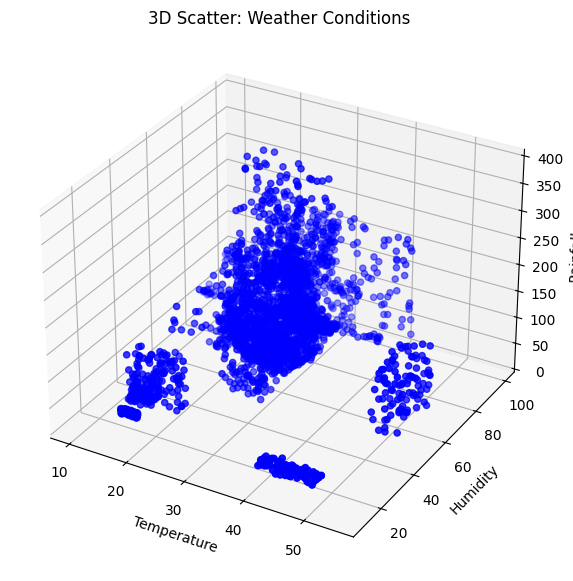

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Temperature'], df['Humidity'], df['Rainfall'], c='blue')
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Rainfall')
plt.title("3D Scatter: Weather Conditions")
plt.show()


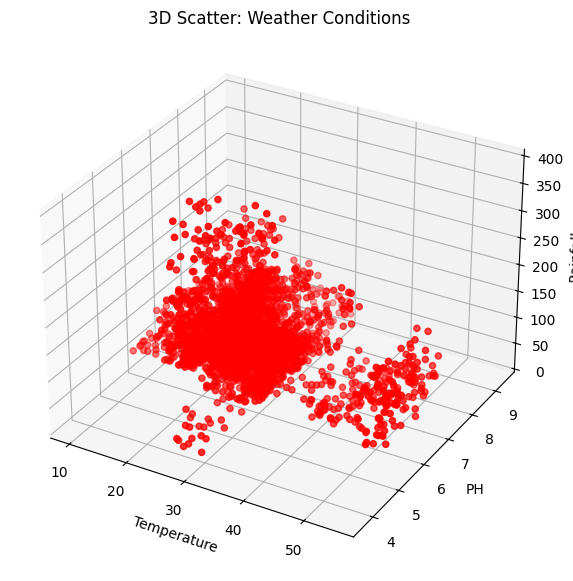

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Temperature'], df['PH'], df['Rainfall'], c='red')
ax.set_xlabel('Temperature')
ax.set_ylabel('PH')
ax.set_zlabel('Rainfall')
plt.title("3D Scatter: Weather Conditions")
plt.show()


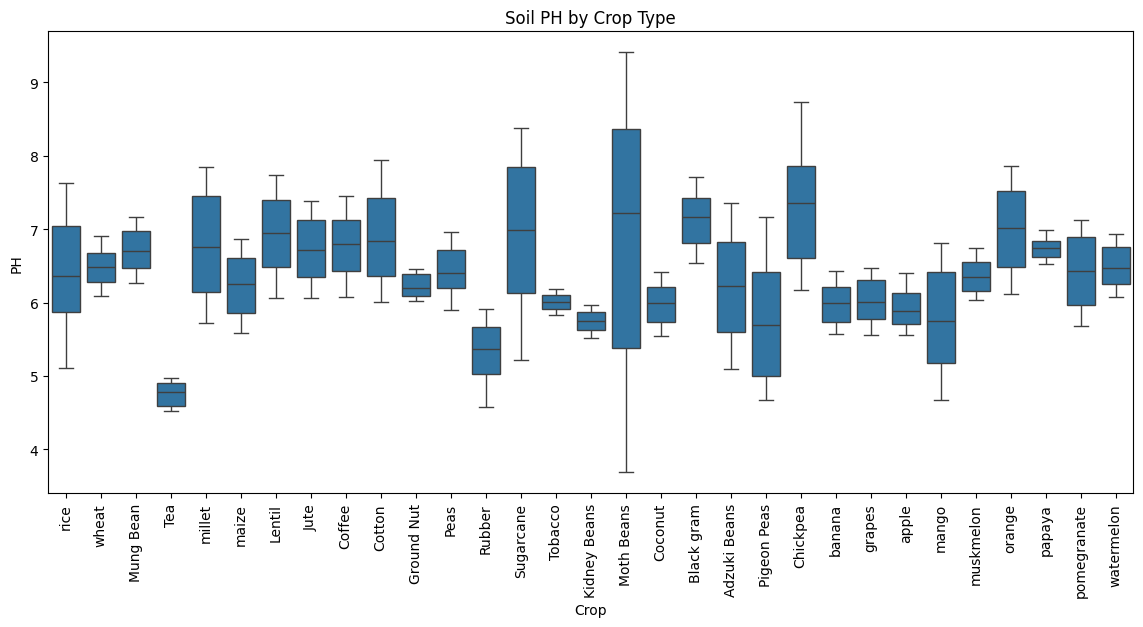

In [24]:
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.boxplot(x='Crop', y='PH', data=df)
plt.xticks(rotation=90)
plt.title("Soil PH by Crop Type")
plt.show()


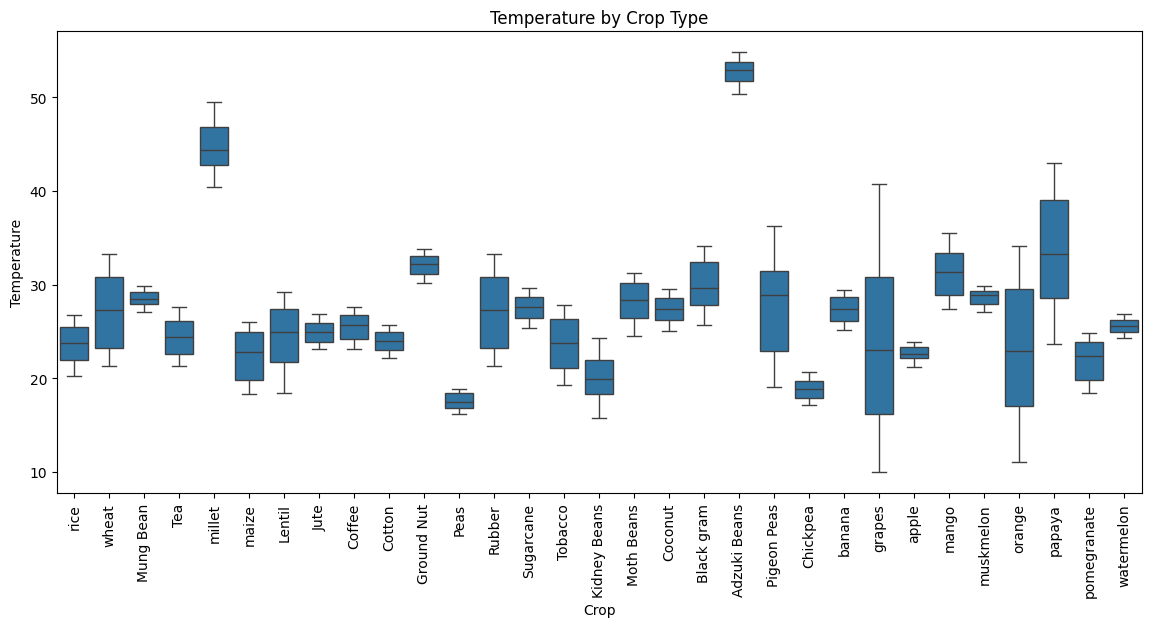

In [25]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Crop', y='Temperature', data=df)
plt.xticks(rotation=90)
plt.title("Temperature by Crop Type")
plt.show()


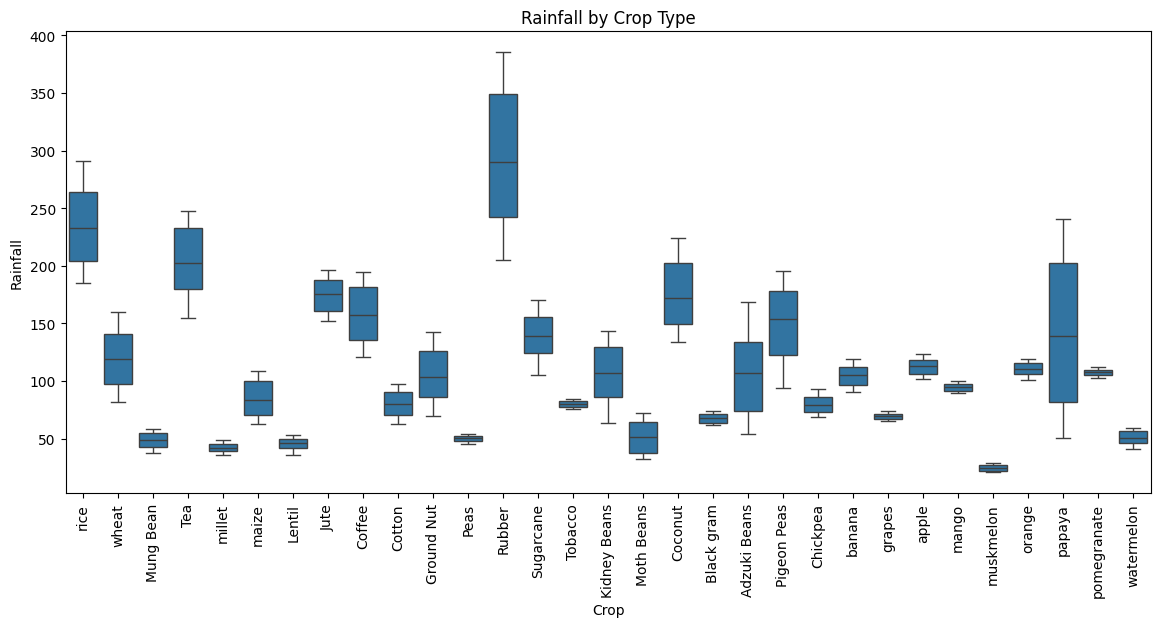

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Crop', y='Rainfall', data=df)
plt.xticks(rotation=90)
plt.title("Rainfall by Crop Type")
plt.show()


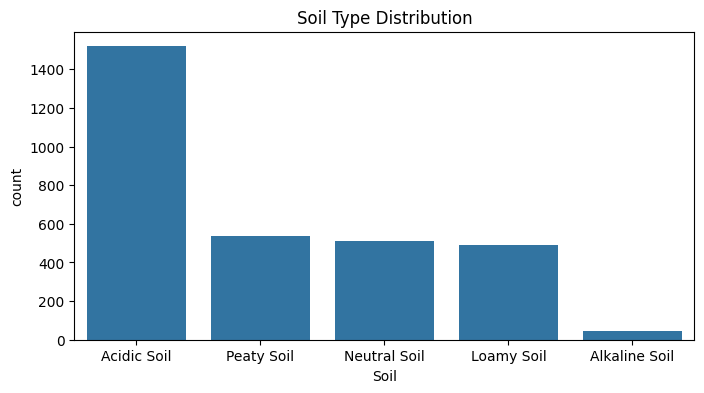

In [27]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Soil', order=df['Soil'].value_counts().index)
plt.title("Soil Type Distribution")
plt.xticks(rotation=0)
plt.show()


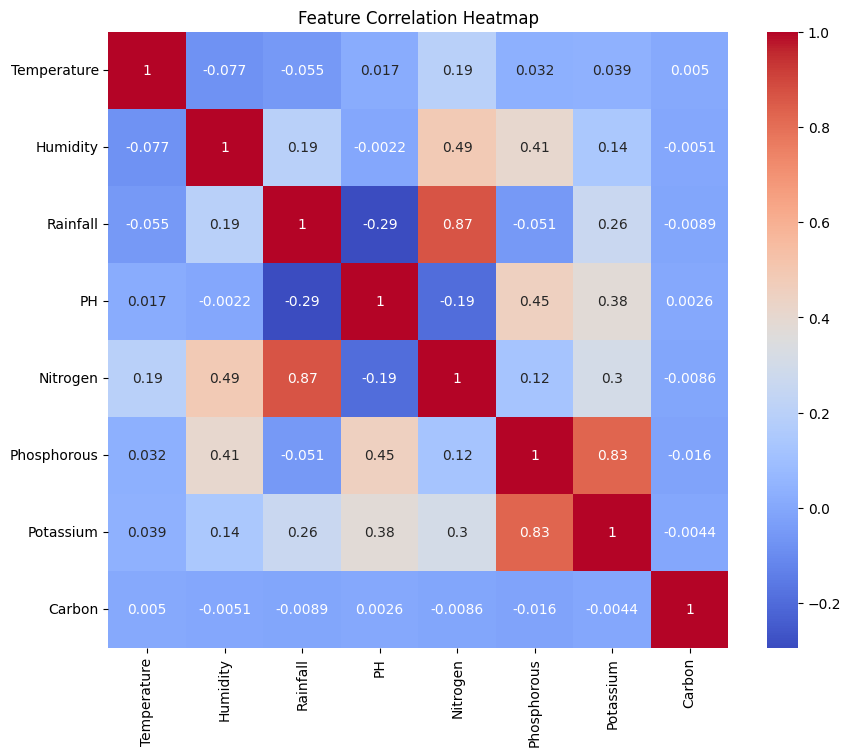

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


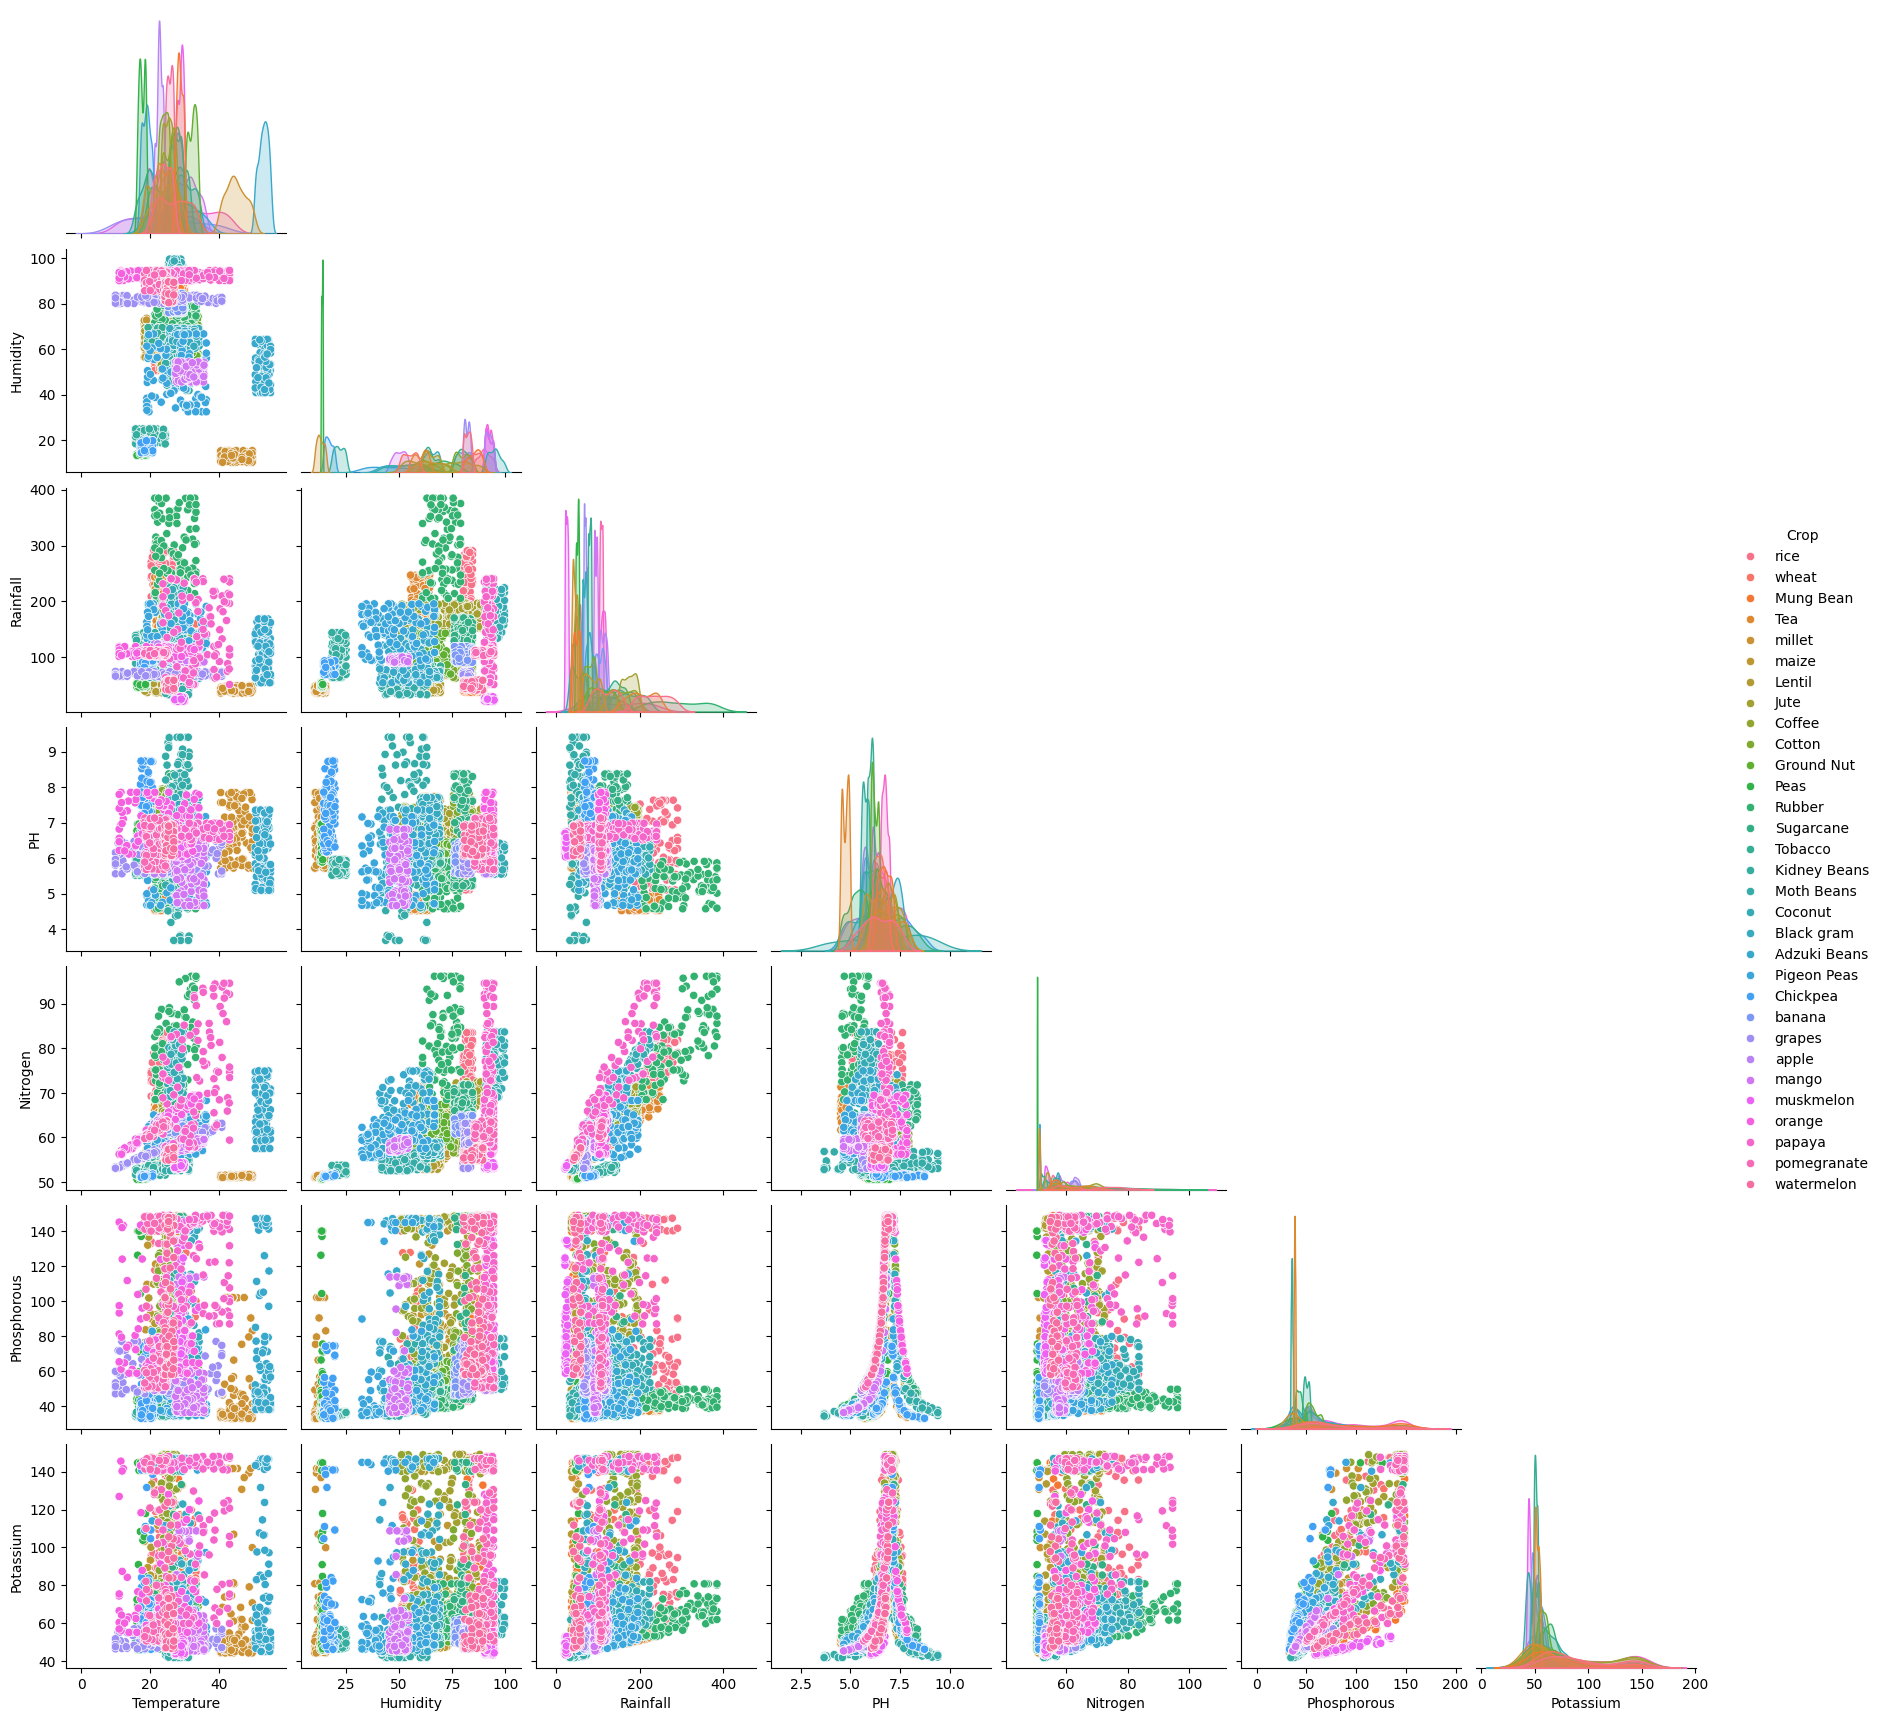

In [29]:
selected_features = ['Temperature', 'Humidity', 'Rainfall', 'PH', 'Nitrogen', 'Phosphorous', 'Potassium']
sns.pairplot(df[selected_features + ['Crop']], hue='Crop', corner=True)
plt.show()


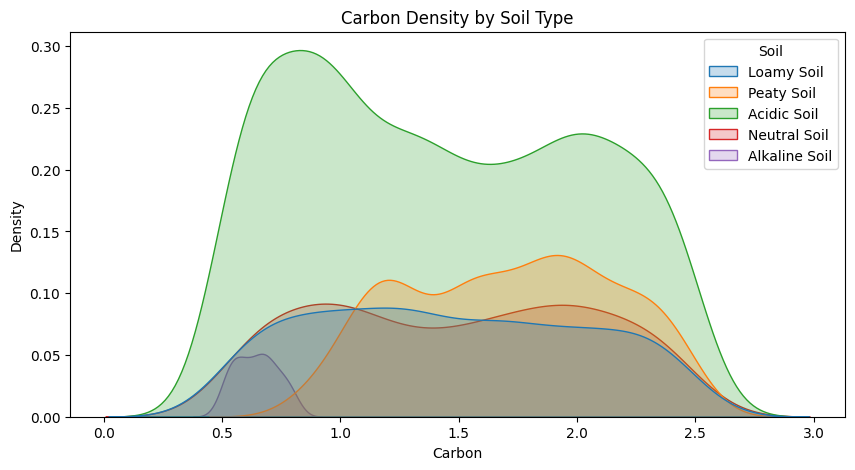

In [30]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Carbon', hue='Soil', fill=True)
plt.title("Carbon Density by Soil Type")
plt.show()


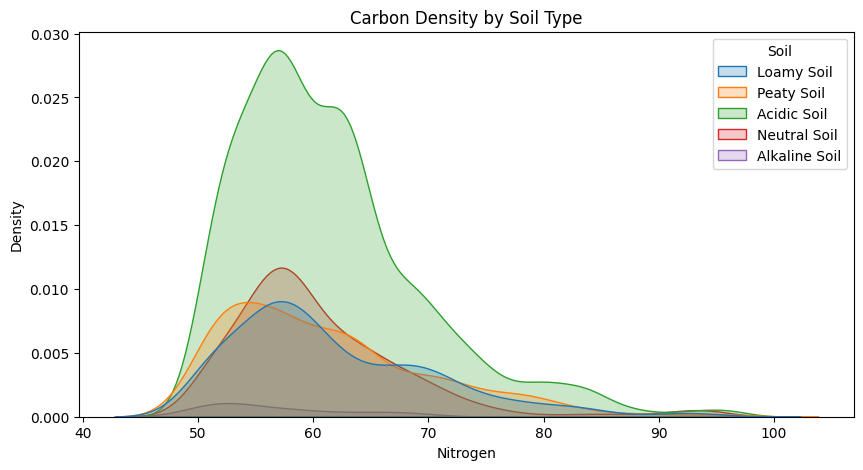

In [31]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Nitrogen', hue='Soil', fill=True)
plt.title("Carbon Density by Soil Type")
plt.show()


In [32]:
df = pd.get_dummies(df, columns=['Soil'], dtype=np.float64)

In [33]:
df

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Crop,Soil_Acidic Soil,Soil_Alkaline Soil,Soil_Loamy Soil,Soil_Neutral Soil,Soil_Peaty Soil
0,20.879744,82.002744,202.935536,6.502985,69.3000,79.50000,94.4400,0.63,rice,0.0,0.0,1.0,0.0,0.0
1,21.770462,80.319644,226.655537,7.038096,72.0200,141.82400,141.6978,1.40,rice,0.0,0.0,1.0,0.0,0.0
2,23.004459,82.320763,263.964248,7.633568,77.7700,59.39000,81.8900,1.80,rice,0.0,0.0,0.0,0.0,1.0
3,26.491096,80.283629,242.864034,6.980401,78.6500,147.45895,142.9430,1.43,rice,0.0,0.0,1.0,0.0,0.0
4,20.280071,81.604873,262.717340,7.628473,73.9800,68.95000,95.7400,1.75,rice,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,25.287846,89.636679,58.286977,6.765095,57.3400,144.48000,73.0800,1.64,watermelon,0.0,0.0,0.0,1.0,0.0
3096,26.638386,84.695469,48.324286,6.189214,56.0600,61.34000,47.9500,1.35,watermelon,0.0,0.0,0.0,0.0,1.0
3097,25.331045,84.305338,41.532187,6.904242,54.9395,145.53795,97.8300,1.58,watermelon,0.0,0.0,0.0,1.0,0.0
3098,26.820601,83.892415,43.971937,6.463271,55.5100,76.89000,50.9200,0.68,watermelon,1.0,0.0,0.0,0.0,0.0


In [ ]:
df['Acidic_Soil	']=df['Soil_Acidic Soil']
df['Alkaline_Soil']=df['Soil_Alkaline Soil']
df['Loamy_Soil']=df['Soil_Loamy Soil']
df['Neutral_Soil']=df['Soil_Neutral Soil']
df['Peaty_Soil']=df['Soil_Peaty Soil']

In [35]:
X=df.drop('Crop', axis=1)
Y=df['Crop']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42,n_estimators=500)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [38]:
model.score(X_test,y_test)

0.9532258064516129

In [39]:
import pickle

# Suppose 'model' is your trained RandomForest or any ML model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [41]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>